---
# Zadaća 6
##### Rok za predaju: 21. travnja, 2021. u 23:59h
##### Način predaje: Teams->Strojno učenje->Assignment, predajete.ipynb datoteka (ili više datoteki u .zip) ili link na Google colab 

### Ime i prezime: Borna Gajić
---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import Generator
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score

rng = np.random.default_rng()

## Zadatak 1
Učitajte podatke koji su vam dani u datoteci 'z1-data.csv'. <br>
Implementirajte k-means algoritam tako da mu ulazni parametri bude broj klastera i da algoritam pokrećete 10 puta sa slučajno odabranim podacima iz zadanog skupa podataka kao početnim centrima te vratite onu particiju koja ima najmanju vrijednost kriterijske funkcije (od tih 10 dobivenih particija). <br>

Kada ste implementirali algoritam, pokrenit ćete ga sa nizom različitih vrijednosti za $K$ - broj klastera. 
- Pokrenite algoritam za $K = 2, 3, 4, 5, 6, 7, 8, 9, 10$
- Za svaki $K$ napravite sljedeće
    - Ispišite broj koraka potreban da algoritam konvergira
    - Ispišite vrijednostu kriterijske funkcije za dobivenu particiju
    - Grafički prikažite podatke s naznačenim centrima. 
- Za jedno od pokretanja nacrtajte graf promjene vrijednosti kriterijske funkcije kroz korake izvršavanja algoritma
- Kada ste pokrenuli algoritam za sve vrijednosti $K$, nacrtajte graf promjene vrijednosti kriterijske funkcije u dobivenoj particiji za $K = 2,3,4,5,6,7,8,9,10$.
    - Za koji izbor $K$ će vrijednost kriterijske funkcije biti najmanja i zašto?
    - Koji broj klastera biste odabrali kao primjeren i zašto?

#### Implementacija K-Means algoritma

In [3]:
def d (x, center): # Distance
    return np.linalg.norm(x - center, ord = 2)

def cost_function (centers, clusters):
    result = 0.0
    for center_idx, points in clusters.items():
        for x in points:
            result += d(x, centers[center_idx])
            
    return result

def k_means (X, n_clusters, draw = False):
    X_copy = []
    if len(X.shape) > 2:
        X_copy = np.copy(X.ravel())
        X_copy = X_copy.reshape((np.prod(X.shape[:-1]), X.shape[-1]))
    else:
        X_copy = np.copy(X)
    
    centers = []
    cost_fun_res = []
    
    min_cost_value = np.inf
    min_cost_centers = []
    min_cost_clusters = []
    iters = 0
    
    for it in range(10):
        # Randomly choose centers from the shuffled data array.
        rng.shuffle(X_copy)
        centers.append(X_copy[:n_clusters].copy())
        iterations = 0
        
        for i in range(100):
            iterations += 1
            # Computes the distance between a point and every clusters center,
            # then places that point in the cluster where it has the shortest distance to that center.
            # Dictionary of k: idx of a center, v: cluster of points
            clusters = {}
            for x in X:
                distances = []
                for c in centers[-1]:
                    distances.append(d(x, c))

                if distances.index(np.min(distances)) in clusters:
                    clusters[distances.index(np.min(distances))].append(x)
                else:
                    clusters[distances.index(np.min(distances))] = [x]
                    
            # Compute a new set of centers - 
            # point A will be the new center of a cluster if it has the lowest sum of the distances to other points.
            same_center_counter = 0
            for center_idx, points in clusters.items():
                
                new_center = np.sum(points, axis = 0) / len(points)
                if (new_center == centers[-1][center_idx]).all():
                    same_center_counter += 1
                else:
                    same_center_counter -= 1
                    centers[-1][center_idx] = new_center
                
            # Centers are the same as the iteration before - nothing changed so exit the loop early
            if same_center_counter == len(centers[0]): break
            
        cost_fun_res.append(cost_function(centers[-1], clusters))
        
        # Take the partition with the lowest cost function result
        if cost_fun_res[-1] <= min_cost_value: 
            min_cost_value = cost_fun_res[-1]
            min_cost_centers = centers[-1]
            min_cost_clusters = clusters.values()
            iters = iterations

    if draw:
        print("Cost function")
        plt.plot(np.arange(len(cost_fun_res)), cost_fun_res)
        plt.xlabel("Random center")
        plt.ylabel("Cost function")
        plt.show()
    
    return min_cost_value, min_cost_centers, iters, min_cost_clusters

In [4]:
def categorise (X, clusters):
    
    categories = np.zeros(len(X), dtype = int)
    
    for idx_x, x in enumerate(X):
        for idx_c, c in enumerate(clusters):
            c_list = list(c)
            if x in np.array(c_list): 
                categories[idx_x] = idx_c
                break
                
    return categories

#### Test

In [6]:
data_1 = np.load('./data-1.npy')

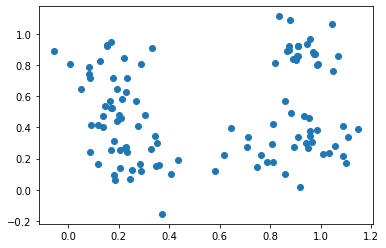

In [7]:
plt.scatter(data_1[:, 0], data_1[:, 1])
plt.show()

Cost function


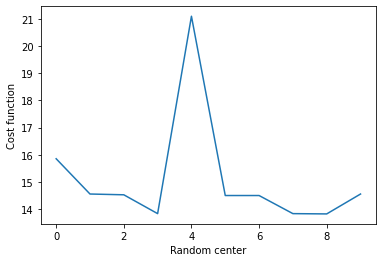

13.821411675010145
[[0.93313849 0.89930119]
 [0.14637474 0.82719162]
 [0.27521459 0.17812482]
 [0.18208026 0.51225769]
 [0.90639599 0.3019623 ]]
7


In [12]:
cost_value, centers_d, iters, clusters_d = k_means(data_1, 5, draw = True)

print(cost_value)
print(centers_d)
print(iters)

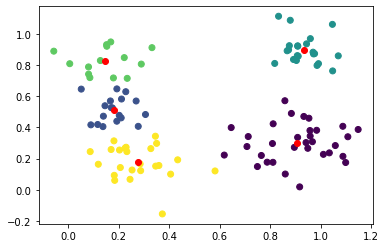

In [13]:
plt.scatter(data_1[:, 0], data_1[:, 1], c = categorise(data_1, clusters_d))
plt.scatter(centers_d[:, 0], centers_d[:, 1], c = 'r')
plt.show()

Idući dio koda trenira i grafički prikazuje dobivene centre i njihove particije. Prvi grafički prikaz u svakoj iteraciji predstavlja odnos rezultata  od nasumično odabranih centara s vrijednosti kriterijske funkcije. 

In [27]:
X = np.load('./z1-data.npy')
X

array([[0.27546235, 0.68351816],
       [0.78267738, 0.15719709],
       [0.71430497, 0.71209151],
       [0.83676215, 0.43917863],
       [0.96980539, 0.63184083],
       [0.11978204, 0.66057572],
       [0.95801766, 0.53176395],
       [0.87285893, 0.35180791],
       [0.61104096, 0.60467486],
       [0.77525491, 0.92324339],
       [0.81047009, 0.42650746],
       [0.80764233, 0.67328967],
       [0.52698481, 0.56981057],
       [0.64367527, 0.20701351],
       [0.06629693, 0.83431536],
       [0.56530648, 0.53105772],
       [0.47427356, 0.21957647],
       [0.72754703, 0.97267539],
       [0.56975841, 0.10855507],
       [0.4680465 , 0.44285038]])

#################### - Start: 2 - ####################
Cost function


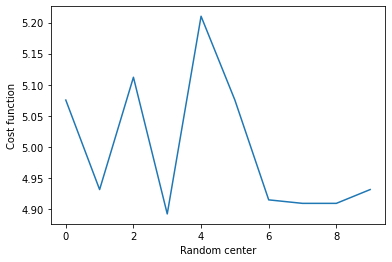

Iterations:  3
Last cost value:  4.8921381014384515
Centers: 
 [[0.46393679 0.4562859 ]
 [0.83029594 0.62915542]]


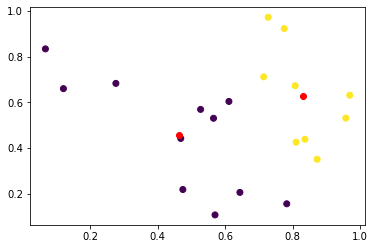

#################### - End: 2 - ####################
#################### - Start: 3 - ####################
Cost function


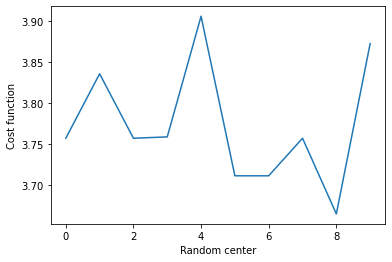

Iterations:  4
Last cost value:  3.665162489399195
Centers: 
 [[0.73954495 0.6833831 ]
 [0.68231528 0.29408582]
 [0.1538471  0.72613641]]


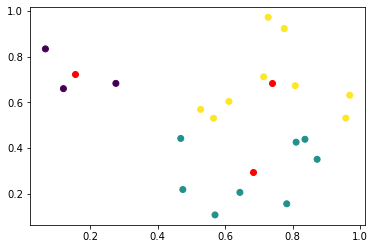

#################### - End: 3 - ####################
#################### - Start: 4 - ####################
Cost function


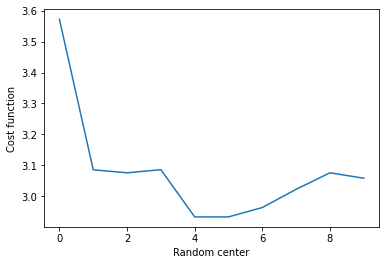

Iterations:  4
Last cost value:  2.932565305637834
Centers: 
 [[0.1538471  0.72613641]
 [0.71292511 0.27283374]
 [0.82542871 0.74081746]
 [0.54284469 0.53709838]]


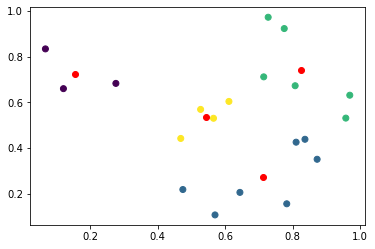

#################### - End: 4 - ####################
#################### - Start: 5 - ####################
Cost function


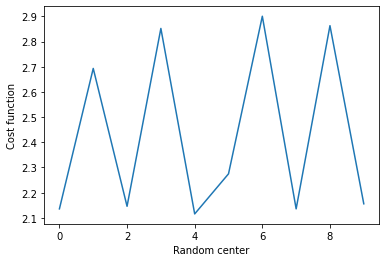

Iterations:  2
Last cost value:  2.1156528177598184
Centers: 
 [[0.57713674 0.57209701]
 [0.61759615 0.17308554]
 [0.1538471  0.72613641]
 [0.75140097 0.94795939]
 [0.87592609 0.50906474]]


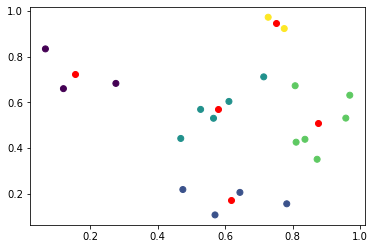

#################### - End: 5 - ####################
#################### - Start: 6 - ####################
Cost function


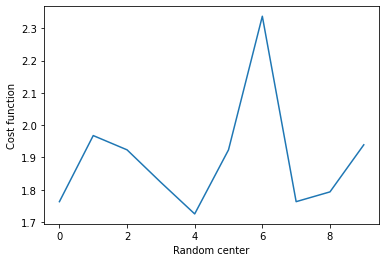

Iterations:  2
Last cost value:  1.7248871407422013
Centers: 
 [[0.1538471  0.72613641]
 [0.61759615 0.17308554]
 [0.75140097 0.94795939]
 [0.54284469 0.53709838]
 [0.83058423 0.67240734]
 [0.86952721 0.43731449]]


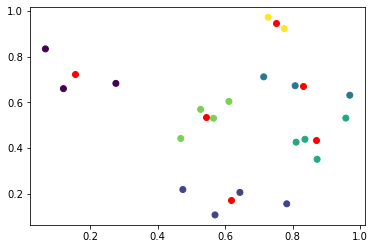

#################### - End: 6 - ####################
#################### - Start: 7 - ####################
Cost function


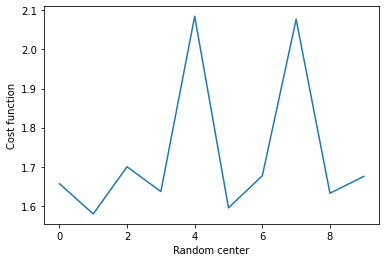

Iterations:  4
Last cost value:  1.579341504809859
Centers: 
 [[0.52201598 0.16406577]
 [0.83058423 0.67240734]
 [0.54284469 0.53709838]
 [0.71317632 0.1821053 ]
 [0.75140097 0.94795939]
 [0.86952721 0.43731449]
 [0.1538471  0.72613641]]


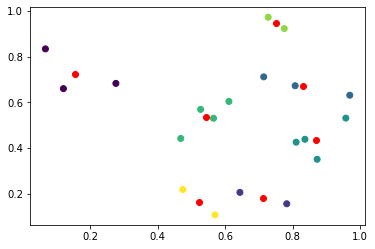

#################### - End: 7 - ####################
#################### - Start: 8 - ####################
Cost function


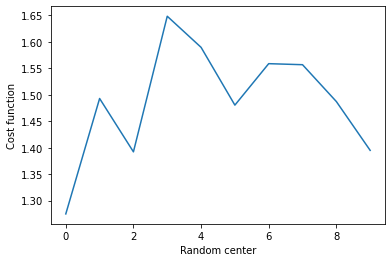

Iterations:  4
Last cost value:  1.274845930885563
Centers: 
 [[0.78267738 0.15719709]
 [0.54284469 0.53709838]
 [0.56256908 0.17838169]
 [0.96391152 0.58180239]
 [0.1538471  0.72613641]
 [0.76097365 0.69269059]
 [0.84003039 0.40583133]
 [0.75140097 0.94795939]]


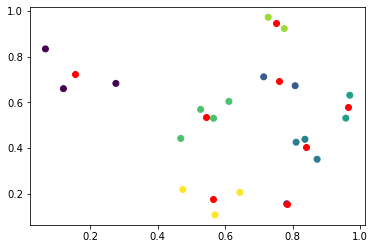

#################### - End: 8 - ####################
#################### - Start: 9 - ####################
Cost function


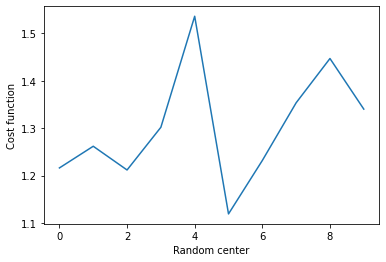

Iterations:  3
Last cost value:  1.118928525209294
Centers: 
 [[0.54284469 0.53709838]
 [0.96391152 0.58180239]
 [0.06629693 0.83431536]
 [0.75140097 0.94795939]
 [0.84003039 0.40583133]
 [0.27546235 0.68351816]
 [0.11978204 0.66057572]
 [0.76097365 0.69269059]
 [0.61759615 0.17308554]]


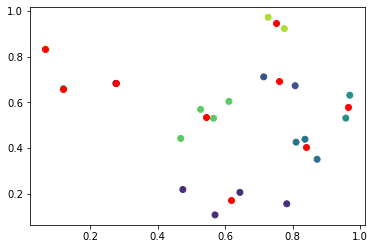

#################### - End: 9 - ####################
#################### - Start: 10 - ####################
Cost function


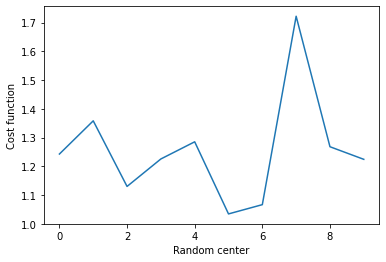

Iterations:  4
Last cost value:  1.0343150970423731
Centers: 
 [[0.4680465  0.44285038]
 [0.95801766 0.53176395]
 [0.96980539 0.63184083]
 [0.61759615 0.17308554]
 [0.19762219 0.67204694]
 [0.56777741 0.56851438]
 [0.06629693 0.83431536]
 [0.75140097 0.94795939]
 [0.84003039 0.40583133]
 [0.76097365 0.69269059]]


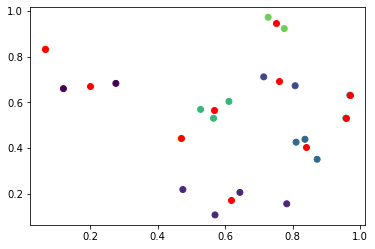

#################### - End: 10 - ####################


In [35]:
for k in range(2, 11):
    print("#################### - Start: " + str(k) + " - ####################")
    
    cost_value, centers, iters, clusters_1 = k_means(X, k, True)
    categories = categorise(X, clusters_1)
    
    print("Iterations: ", iters)
    print("Last cost value: ", cost_value)
    print("Centers: \n", centers)
    
    plt.scatter(X[:, 0], X[:, 1], c = categories)
    plt.scatter(centers[:, 0], centers[:, 1], c = 'r')
    plt.show()
    
    print("#################### - End: " + str(k) + " - ####################")

Odabrao bi model s pet centra jer mislim da najbolje kategorizira podatke.

---
## Zadatak 2
Učitajte podatke koji su vam dani u datoteci 'z2-data.csv'. <br>
Primjenom k-means algortima implementiranog u prethodnim zadacima pokrenite algoritam za $K = 2,3,4,5,6,7,8,9,10$. <br>
- Za svaki $K$, kada ste pokrenuli algoritam i dobili particiju, izračunajte vrijednost funkcije $\mathcal{F}_{LS}$
- Za svaki $K$, kada ste pokrenuli algoritam i dobili particiju, izračunajte Calinski–Harabasz indeks

Koju particiju biste odabrali kao primjerenu na temelju izračunatih indeksa? Obrazložite. 

In [30]:
def F_ls (center, X):
    distance_sum = 0
    for x in X:
        distance_sum += d(center, x)
    return distance_sum

In [31]:
X2 = np.load('./z2-data.npy')

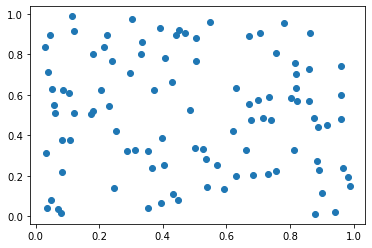

In [32]:
plt.scatter(X2[:, 0], X2[:, 1])
plt.show()

#################### - Start: 2 - ####################
Cost function


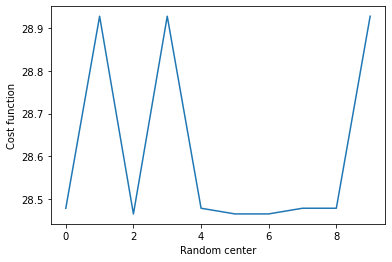

Iterations:  5
Last cost value:  28.46461374926623
Centers: 
 [[0.23518423 0.59418769]
 [0.73806709 0.41543642]]


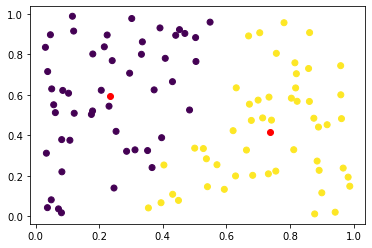

F_ls([0.23518423 0.59418769], x_i) = 5.9855511517042554 
F_ls([0.73806709 0.41543642], x_i) = 5.75158826836537 
Calinski - Harbasz score:  70.96576805134544
#################### - End: 2 - ####################
#################### - Start: 3 - ####################
Cost function


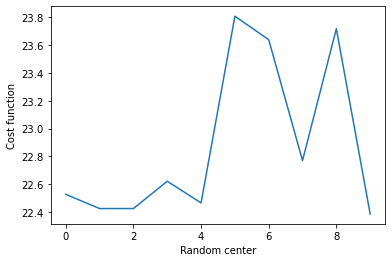

Iterations:  7
Last cost value:  22.387973693356383
Centers: 
 [[0.26948221 0.75379601]
 [0.81682485 0.47526833]
 [0.32200843 0.21701473]]


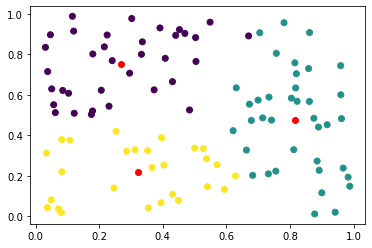

F_ls([0.26948221 0.75379601], x_i) = 7.93976205079399 
F_ls([0.81682485 0.47526833], x_i) = 8.3019728662486 
F_ls([0.32200843 0.21701473], x_i) = 7.84182189043446 
Calinski - Harbasz score:  88.80491133722896
#################### - End: 3 - ####################
#################### - Start: 4 - ####################
Cost function


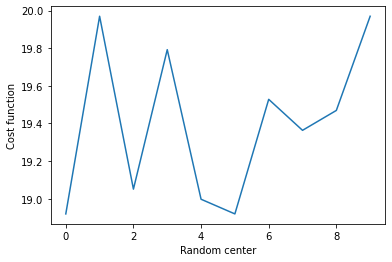

Iterations:  7
Last cost value:  18.919263902304387
Centers: 
 [[0.27594788 0.80831843]
 [0.20693521 0.28937852]
 [0.72950346 0.21389928]
 [0.78816922 0.6360619 ]]


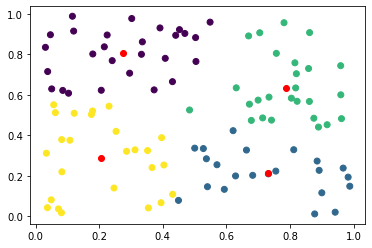

F_ls([0.27594788 0.80831843], x_i) = 10.033510584931644 
F_ls([0.20693521 0.28937852], x_i) = 9.816315375270323 
F_ls([0.72950346 0.21389928], x_i) = 9.802547793264534 
F_ls([0.78816922 0.6360619 ], x_i) = 9.20274886022497 
Calinski - Harbasz score:  97.81409488130778
#################### - End: 4 - ####################
#################### - Start: 5 - ####################
Cost function


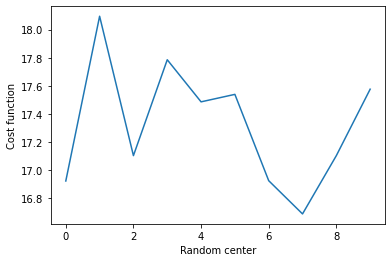

Iterations:  4
Last cost value:  16.686011572815175
Centers: 
 [[0.82306713 0.29248585]
 [0.79058573 0.70647214]
 [0.33720928 0.83254656]
 [0.34489718 0.18973684]
 [0.11381793 0.54131453]]


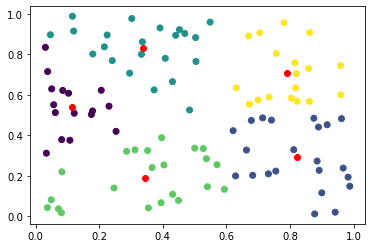

F_ls([0.82306713 0.29248585], x_i) = 11.53877772700444 
F_ls([0.79058573 0.70647214], x_i) = 11.056113766216 
F_ls([0.33720928 0.83254656], x_i) = 10.796138901585996 
F_ls([0.34489718 0.18973684], x_i) = 10.986266917664011 
F_ls([0.11381793 0.54131453], x_i) = 10.917433654610704 
Calinski - Harbasz score:  96.4510951299453
#################### - End: 5 - ####################
#################### - Start: 6 - ####################
Cost function


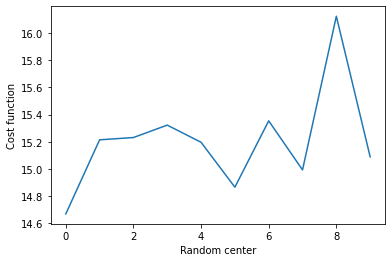

Iterations:  7
Last cost value:  14.668347581170563
Centers: 
 [[0.09502352 0.08922253]
 [0.80032562 0.64048675]
 [0.86805954 0.18246141]
 [0.47075106 0.25568987]
 [0.11933206 0.52171074]
 [0.3166114  0.84663432]]


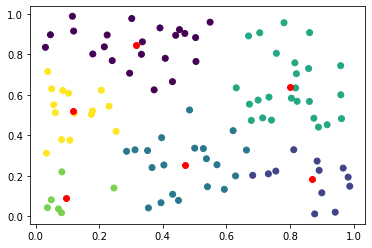

F_ls([0.09502352 0.08922253], x_i) = 14.799389673124253 
F_ls([0.80032562 0.64048675], x_i) = 12.205942704411923 
F_ls([0.86805954 0.18246141], x_i) = 13.891210279763675 
F_ls([0.47075106 0.25568987], x_i) = 10.29765053734832 
F_ls([0.11933206 0.52171074], x_i) = 11.73815734795827 
F_ls([0.3166114  0.84663432], x_i) = 12.653223750874307 
Calinski - Harbasz score:  103.70994073688405
#################### - End: 6 - ####################
#################### - Start: 7 - ####################
Cost function


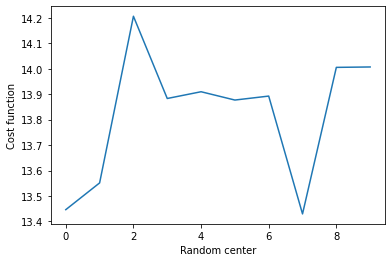

Iterations:  6
Last cost value:  13.429436613162535
Centers: 
 [[0.60854162 0.89100099]
 [0.11933206 0.52171074]
 [0.86805954 0.18246141]
 [0.25288893 0.83095487]
 [0.13214341 0.08232443]
 [0.81167053 0.57709176]
 [0.47685044 0.26699271]]


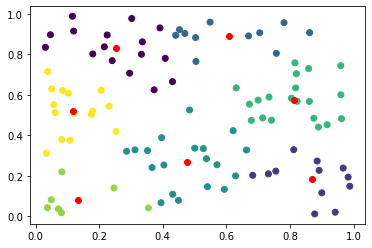

F_ls([0.60854162 0.89100099], x_i) = 14.068440047346225 
F_ls([0.11933206 0.52171074], x_i) = 13.040503311993014 
F_ls([0.86805954 0.18246141], x_i) = 15.328541366379342 
F_ls([0.25288893 0.83095487], x_i) = 13.805585746851582 
F_ls([0.13214341 0.08232443], x_i) = 16.384409600011587 
F_ls([0.81167053 0.57709176], x_i) = 12.659378379673127 
F_ls([0.47685044 0.26699271], x_i) = 11.447569615750657 
Calinski - Harbasz score:  107.99636991136055
#################### - End: 7 - ####################
#################### - Start: 8 - ####################
Cost function


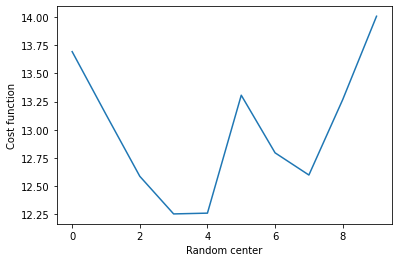

Iterations:  7
Last cost value:  12.254171399914004
Centers: 
 [[0.16432856 0.8802006 ]
 [0.46283405 0.24687773]
 [0.12541936 0.53671379]
 [0.80310931 0.82322956]
 [0.78831359 0.53095432]
 [0.42203799 0.82339613]
 [0.86805954 0.18246141]
 [0.08632156 0.12100046]]


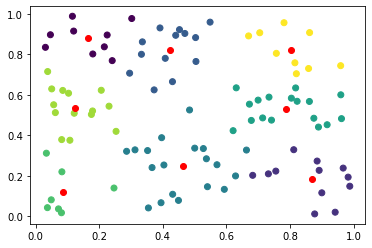

F_ls([0.16432856 0.8802006 ], x_i) = 16.084070575348374 
F_ls([0.46283405 0.24687773], x_i) = 12.832694301089909 
F_ls([0.12541936 0.53671379], x_i) = 13.96305718277762 
F_ls([0.80310931 0.82322956], x_i) = 15.541195576931793 
F_ls([0.78831359 0.53095432], x_i) = 13.112621541100502 
F_ls([0.42203799 0.82339613], x_i) = 13.32412791502135 
F_ls([0.86805954 0.18246141], x_i) = 16.662541161682924 
F_ls([0.08632156 0.12100046], x_i) = 17.926314162065047 
Calinski - Harbasz score:  114.87457578239442
#################### - End: 8 - ####################
#################### - Start: 9 - ####################
Cost function


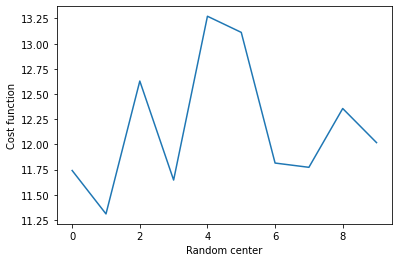

Iterations:  14
Last cost value:  11.309982983638738
Centers: 
 [[0.36313518 0.20814458]
 [0.06469014 0.07919364]
 [0.9162777  0.17275582]
 [0.15171313 0.86373416]
 [0.12512904 0.50786606]
 [0.61276504 0.25607232]
 [0.42203799 0.82339613]
 [0.80310931 0.82322956]
 [0.78025976 0.53697314]]


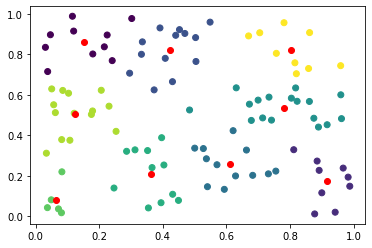

F_ls([0.36313518 0.20814458], x_i) = 14.146099407575075 
F_ls([0.06469014 0.07919364], x_i) = 19.702329440633093 
F_ls([0.9162777  0.17275582], x_i) = 18.296688069988278 
F_ls([0.15171313 0.86373416], x_i) = 17.499426876637962 
F_ls([0.12512904 0.50786606], x_i) = 14.956013402898508 
F_ls([0.61276504 0.25607232], x_i) = 13.300501984795433 
F_ls([0.42203799 0.82339613], x_i) = 14.583639763360074 
F_ls([0.80310931 0.82322956], x_i) = 16.792258594753633 
F_ls([0.78025976 0.53697314], x_i) = 13.855180935142002 
Calinski - Harbasz score:  115.33142032161278
#################### - End: 9 - ####################
#################### - Start: 10 - ####################
Cost function


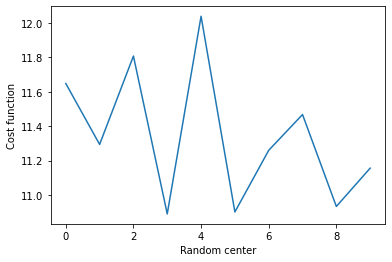

Iterations:  12
Last cost value:  10.89088130467684
Centers: 
 [[0.09037624 0.62498429]
 [0.61276504 0.25607232]
 [0.13863594 0.45286171]
 [0.79952701 0.52541354]
 [0.06469014 0.07919364]
 [0.36313518 0.20814458]
 [0.42648237 0.8021136 ]
 [0.92933711 0.15323437]
 [0.16432856 0.8802006 ]
 [0.80310931 0.82322956]]


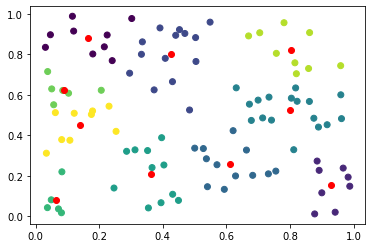

F_ls([0.09037624 0.62498429], x_i) = 16.112293559432526 
F_ls([0.61276504 0.25607232], x_i) = 14.253191859484748 
F_ls([0.13863594 0.45286171], x_i) = 15.064499764316414 
F_ls([0.79952701 0.52541354], x_i) = 15.123245925108408 
F_ls([0.06469014 0.07919364], x_i) = 20.447983809647052 
F_ls([0.36313518 0.20814458], x_i) = 14.827199132054304 
F_ls([0.42648237 0.8021136 ], x_i) = 14.964484602250554 
F_ls([0.92933711 0.15323437], x_i) = 20.194754512863906 
F_ls([0.16432856 0.8802006 ], x_i) = 18.096771471929607 
F_ls([0.80310931 0.82322956], x_i) = 17.990744046941522 
Calinski - Harbasz score:  110.25812172071288
#################### - End: 10 - ####################


In [33]:
for k in range(2, 11):
    print("#################### - Start: " + str(k) + " - ####################")
    cost_value, centers, iters, clusters_2 = k_means(X2, k, True)
    labels = categorise(X2, clusters_2)
    
    print("Iterations: ", iters)
    print("Last cost value: ", cost_value)
    print("Centers: \n", centers)

    plt.scatter(X2[:, 0], X2[:, 1], c = labels)
    plt.scatter(centers[:, 0], centers[:, 1], c = 'r')
    plt.show()
    
    for i in range(k):
        print("F_ls({0}, x_i) = {1} ".format(centers[i], F_ls(centers[i], clusters_2)))
        

    print("Calinski - Harbasz score: ", calinski_harabasz_score(X2, labels))
    
    print("#################### - End: " + str(k) + " - ####################")

Odabrao bi model s 8 kategorija, jer mislim da je najbolje ako maksimiziramo Calinski - Harbasz rezultat, a minimiziramo broj kategorija. No u više napravljenih testiranja primjetio sam je idealni broj kategorija za ovaj skup podataka više od 5 a u rijetkim slućajevima (kao ovaj) je čak i 10 dobar. Najčešće budu najbolji oko 7 kategorija.

---
## Zadatak 3
U ovom zadatku je cilj pomoću k-means algoritma kompresirati sliku. <br>
Koristeći 24-bitnu reprezentaciju slike, svaki piksel je reprezentiran pomoću tri 8-bitna cijela broja (u rasponu 0-255), gdje ti cijeli brojevi predstavljaju intenzitet crvene (Red), zelene (Green) i plave (Blue). Što znači da svaki piksel može poprimiti jedan od $2^8$ intenziteta crvene, $2^8$ zelene i $2^8$ plave. Sve zajedno daje $2^{24}$ različitih boja. <br>
Vaš zadatak će biti jednu takvu sliku kompresirati na samo 16 boja. <br>
Pomoću k-means algoritma je potrebno odabrati 16 boja koje će reprezentirati sve boje na slici. <br>
Svaki piksel na slici nam predstavlja jedan podatak i piksele želimo grupirati u 16 grupa. Kada to napravimo - imamo 16 grupa tj. 16 boja, potrebno je na originalnoj slici sve piksele obojati u onu boju (grupu) kojoj pripadaju. 

Učitajte proizvoljnu sliku. Možete koristiti `PIL` biblioteku.  

In [43]:
from PIL import Image

datapath = './image.jpg'
im = Image.open(datapath)

im_array = np.asarray(im)
im_array

array([[[219, 218, 216],
        [216, 215, 213],
        [219, 218, 216],
        ...,
        [223, 220, 211],
        [222, 219, 210],
        [221, 218, 211]],

       [[224, 220, 219],
        [218, 214, 213],
        [222, 218, 217],
        ...,
        [220, 217, 210],
        [222, 219, 212],
        [223, 220, 213]],

       [[221, 217, 214],
        [215, 211, 208],
        [224, 219, 216],
        ...,
        [221, 218, 213],
        [223, 220, 215],
        [223, 220, 215]],

       ...,

       [[185, 171, 162],
        [180, 166, 157],
        [175, 161, 152],
        ...,
        [217, 212, 209],
        [217, 212, 208],
        [218, 213, 209]],

       [[186, 172, 163],
        [184, 167, 159],
        [179, 162, 154],
        ...,
        [219, 211, 209],
        [219, 211, 208],
        [220, 212, 209]],

       [[187, 173, 164],
        [183, 169, 160],
        [180, 163, 153],
        ...,
        [219, 211, 209],
        [220, 210, 208],
        [221, 211, 209]]

Pretvorimo pixel $(x, y, [r, g, b])$ u $([r, g, b])$

In [79]:
X_im = np.copy(im_array.ravel())
X_im = X_im.reshape((np.prod(im_array.shape[:-1]), im_array.shape[-1]))
X_im

array([[219, 218, 216],
       [216, 215, 213],
       [219, 218, 216],
       ...,
       [219, 211, 209],
       [220, 210, 208],
       [221, 211, 209]], dtype=uint8)

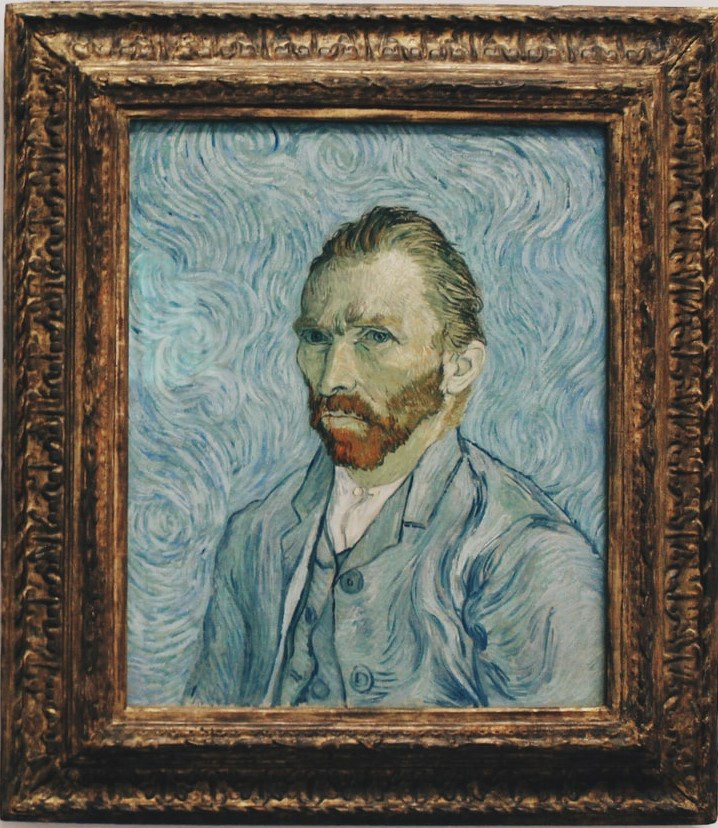

In [44]:
im

#### Implementacija rješenja problema

Scikit learn KMeans:

In [93]:
kmeans_16 = KMeans(n_clusters = 16).fit(X_im)
kmeans_2 = KMeans(n_clusters = 2).fit(X_im)

Centri:

In [95]:
print("Centri za 16 boja: \n", kmeans_16.cluster_centers_)
print("\nCentri za 2 boje: \n", kmeans_2.cluster_centers_)

Centri za 16 boja: 
 [[147.74474263 121.3877805   89.21245178]
 [ 32.12447546  30.95541092  28.5705518 ]
 [143.55381363 161.98194205 159.61038371]
 [ 82.82770285 109.1603511  109.47163348]
 [189.52582452 172.10504045 139.91070317]
 [110.05677827  81.32623491  57.81374863]
 [160.21503537 176.28264531 173.83065122]
 [ 50.08046992  42.02183213  34.85805718]
 [109.62310679 132.59397259 130.24179074]
 [ 90.11420455  66.10298295  48.28091856]
 [ 52.9086554   78.46721046  82.63371528]
 [165.95029534 146.34189455 111.40380661]
 [211.19021387 201.55767984 186.68924174]
 [130.25978958  99.00665412  70.26250697]
 [127.55080612 148.8271237  146.33870749]
 [ 69.9106088   53.32957605  41.17006229]]

Centri za 2 boje: 
 [[141.1154925  149.95380028 139.8675111 ]
 [ 67.7657181   56.44883885  45.60190333]]


Obojajmo svaki pixel u boju odgovarajućeg centra

In [96]:
im_array_uglified_16 = X_im.copy()
im_array_uglified_2 = X_im.copy()

for idx, x in enumerate(X_im):
    im_array_uglified_16[idx] = kmeans_16.cluster_centers_[kmeans_16.labels_[idx]]
    im_array_uglified_2[idx] = kmeans_2.cluster_centers_[kmeans_2.labels_[idx]]
    
im_array_uglified_16 = im_array_uglified_16.reshape(im_array.shape)
im_array_uglified_2 = im_array_uglified_2.reshape(im_array.shape)

print(im_array_uglified_16)
print(im_array_uglified_2)

[[[211 201 186]
  [211 201 186]
  [211 201 186]
  ...
  [211 201 186]
  [211 201 186]
  [211 201 186]]

 [[211 201 186]
  [211 201 186]
  [211 201 186]
  ...
  [211 201 186]
  [211 201 186]
  [211 201 186]]

 [[211 201 186]
  [211 201 186]
  [211 201 186]
  ...
  [211 201 186]
  [211 201 186]
  [211 201 186]]

 ...

 [[189 172 139]
  [189 172 139]
  [189 172 139]
  ...
  [211 201 186]
  [211 201 186]
  [211 201 186]]

 [[189 172 139]
  [189 172 139]
  [189 172 139]
  ...
  [211 201 186]
  [211 201 186]
  [211 201 186]]

 [[189 172 139]
  [189 172 139]
  [189 172 139]
  ...
  [211 201 186]
  [211 201 186]
  [211 201 186]]]
[[[141 149 139]
  [141 149 139]
  [141 149 139]
  ...
  [141 149 139]
  [141 149 139]
  [141 149 139]]

 [[141 149 139]
  [141 149 139]
  [141 149 139]
  ...
  [141 149 139]
  [141 149 139]
  [141 149 139]]

 [[141 149 139]
  [141 149 139]
  [141 149 139]
  ...
  [141 149 139]
  [141 149 139]
  [141 149 139]]

 ...

 [[141 149 139]
  [141 149 139]
  [141 149 139]
  ..

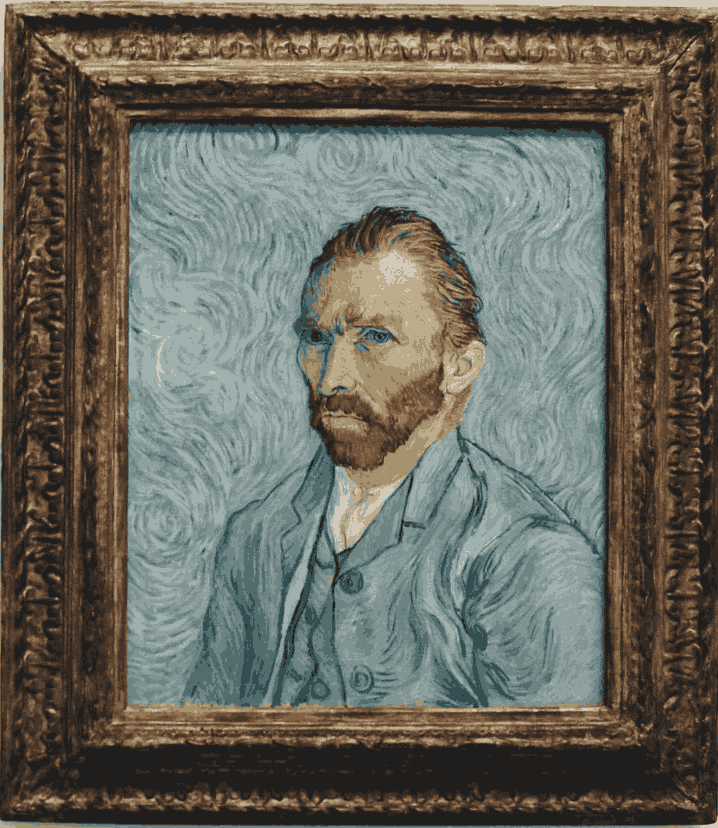

In [97]:
im_uglified_16 = Image.fromarray(im_array_uglified_16)
im_uglified_16

Ista slika ali s dva centra, tj. dvije boje.

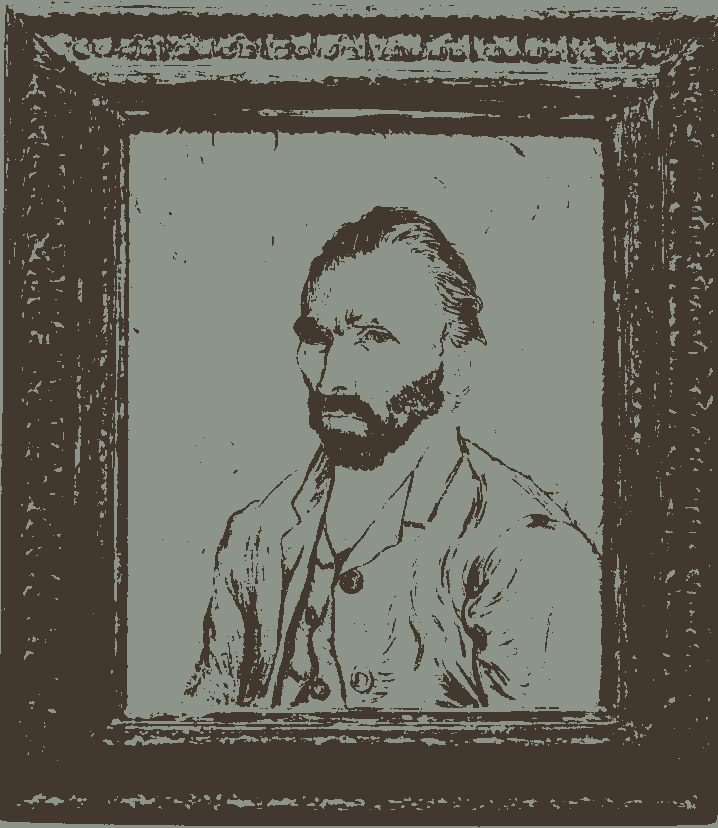

In [98]:
im_uglified_2 = Image.fromarray(im_array_uglified_2)
im_uglified_2

**Što se dogodilo?**  
Odabrani su centri koji predstavljaju **boju**, te se u algoritmu određuje udaljenost od svakog pixela do svakog centra nakon čega se pridodaje onom centru kojem je najbliži. Boja pixela je prikazana u obliku 3d vektora: $(r, g, b)^T = (0 - 255, 0 - 255, 0 - 255)^T$; pa je u tom smislu onda određena "najmanja udaljenost" boje pixela do boje centra.

---
## Zadatak 4 
Ucitajte podatke 'z1-data1.npy' i 'z1-data2.npy'. Pomoću kmeans algoritma (na vježbama smo pokazali kako koristiti kmeans algoritam iz paketa sklearn) grupirajte podatake u 5 klastera. Koristeći funkciju danu u predlošku, vizualizirajte podatke. 
<br>
Što možete reći o kmeans algoritmu na temelju dobivenog grafičkog prikaza?

In [173]:
# Funkcija za crtanje
from scipy.spatial.distance import cdist

def plot_kmeans(X,labels, centers, n_clusters=4, rseed=0, ax=None):
    # Proslijedite argumente
    # X- podaci
    # labels - oznake pripadnosi klasteru za svaki podatak
    # centers - centri klastera
    # n_cluster - broj klastera
    
    
    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)

    # plot the representation of the KMeans model
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

Učitavanje skupa podataka

In [108]:
data_1 = np.load('./data-1.npy')
data_2 = np.load('./z2-data.npy')

data_1, data_2

(array([[ 0.96675106,  0.30851874],
        [ 0.21082926,  0.5824621 ],
        [ 0.91052673,  0.8574922 ],
        [ 0.12716877,  0.82948387],
        [ 0.23200801,  0.2450155 ],
        [ 0.95698744,  0.38035683],
        [ 0.87237735,  0.89799234],
        [ 0.28461421,  0.16592702],
        [ 0.20959817,  0.46157232],
        [ 0.76452292,  0.2202199 ],
        [ 0.9484916 ,  0.26622948],
        [ 0.8952091 ,  0.27233504],
        [ 1.14786706,  0.38704219],
        [ 0.94147707,  0.30318858],
        [ 1.08760939,  0.21470087],
        [ 1.09844514,  0.17497734],
        [ 0.95786345,  0.34486748],
        [ 0.8085449 ,  0.29689967],
        [ 1.01021752,  0.22744716],
        [ 1.03370181,  0.2369969 ],
        [ 0.22773366,  0.62952813],
        [ 0.26870335,  0.5698157 ],
        [ 0.14536782,  0.53937242],
        [ 0.08561866,  0.7199208 ],
        [ 0.19246106,  0.6475696 ],
        [ 0.1668526 ,  0.57015803],
        [ 0.05141474,  0.64615173],
        [ 0.17878274,  0.717

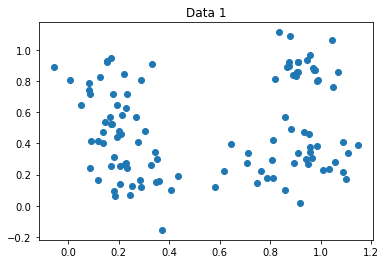

In [109]:
plt.scatter(data_1[:, 0], data_1[:, 1])
plt.title("Data 1")
plt.show()

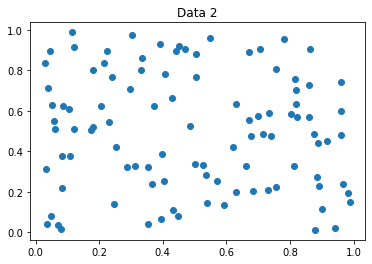

In [110]:
plt.scatter(data_2[:, 0], data_2[:, 1])
plt.title("Data 2")
plt.show()

Treniranje za `data-1` skup podataka

In [111]:
kmeans = KMeans(n_clusters = 5)
kmeans.fit(data_1)

KMeans(n_clusters=5)

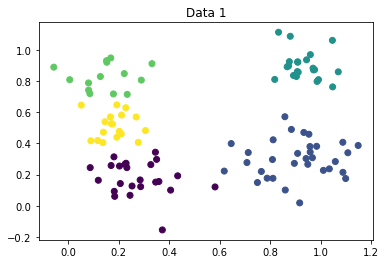

In [112]:
plt.scatter(data_1[:, 0], data_1[:, 1], c = kmeans.labels_)
plt.title("Data 1")
plt.show()

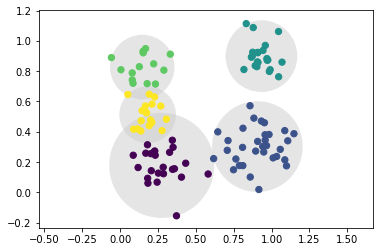

In [117]:
plot_kmeans(data_1, kmeans.labels_, kmeans.cluster_centers_, 5)

Treniranje za `data-2` skup podataka

In [178]:
kmeans = KMeans(n_clusters = 5)
kmeans.fit(data_2)

KMeans(n_clusters=5)

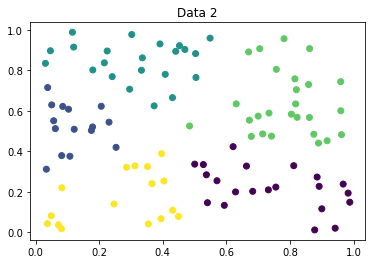

In [179]:
plt.scatter(data_2[:, 0], data_2[:, 1], c = kmeans.labels_)
plt.title("Data 2")
plt.show()

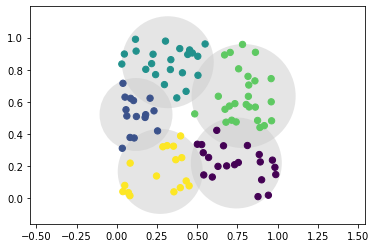

In [180]:
plot_kmeans(data_2, kmeans.labels_, kmeans.cluster_centers_, 5)

Radijus klastera je definiran najdaljim podatkom od centra tog klastera

---

## Zadatak 5
Implementirajte EM algoritam tako da mu proslijeđujete neke početne vrijednosti za parametre $\mu, \sigma, p$. 

- Pokrenite algoritam na podacima zadanim u 'z2-data.npy' s k = 2 i početnim vrijednostima parametara $\mu = [30,30]$, $\sigma = [100,100]$, $p = [0.5,0.5]$
    - Ispišite dobivene vrijednosti parametara, broj koraka koje je algoritam izvršio
    - Prikažite graf promjene vrijednosti funkcije log-izglednosti kroz iteracije
- Pokrenite algoritam s različitim vrijednostima k = 2, 3, 4, 5 tako da za svaki k proslijedite slučajno odabrate početne vrijednosti parametara i algoritam pokrenete 10 putazatim odaberete najbolji rezultat za od tih 10 za dani k. 
    - Za svaki k ispišite broj iteracija koje je algoritam izvršio. 
    - za svaki k prikažite graf promjene vrijednosti funkcije log-izglednosti kroz iteracije


**Implementacija EM algoritma**

Expetance - očekivana vrijednost pripadanja i-tog podatka j-tom klasteru ($\gamma_{ij}$)  
Centers - centri klastera ($\mu_{j}$)  
Probability - postotak pokrivenosti određenog klastera nad skupom podataka ($p$)

In [193]:
def bic (m, k, L): # Bayesian information criterion
    return k * np.log(m) - 2 * np.log(L)

def log_likelihood (X, n_centers, m, s, p):
    a = ((p / (s * np.sqrt(2*np.pi))) * np.exp( -1 * (X - m)**2 / (2 * s**2) )).sum(axis = 1).reshape(-1, 1)
    result = a.sum(axis = 0)
    
    return result

def EM (X, n_clusters, centers, deviation, probability): # Expectation–maximization algorithm
    m, s, p = centers, deviation, probability # mi, sigma, p
    gamma = np.ones((X.shape[0], n_clusters)) # expectation
    cost_function_results = [log_likelihood(X, n_clusters, m, s, p)]
    iterations = 0
    
    for it in range(100):
        # E step
        a = (p / (s * np.sqrt(2*np.pi))) * np.exp( -1 * (X - m)**2 / (2 * s**2) )
        b = a.sum(axis = 1).reshape(-1, 1)
        gamma = a / b
        
        old_centers = m.copy()
        
        # M step
        ma = (gamma * X).sum(axis = 0)
        mb = gamma.sum(axis = 0)
        sa = (gamma * (X - m)**2).sum(axis = 0)

        m = ma / mb
        s = np.sqrt(sa / mb)
        p = mb / X.shape[0]
        
        cost_function_results.append(log_likelihood(X, n_clusters, m, s, p))
        
        if np.allclose(old_centers, m): 
            iterations = it
            break
            
    if iterations == 0: iterations = 100
            
    return  m, s, p, iterations, cost_function_results

Skup podataka `z2-data`

In [12]:
X3 = np.load('./z3-data.npy')
X3

array([[24.61400269],
       [23.82609848],
       [29.39804934],
       ...,
       [41.45367005],
       [45.37500698],
       [32.71288634]])

Centers:
 [33.96797106 33.96797106] 
Deviation:
 [10.45670602 10.45670602] 
Probability:
 [0.5 0.5] 
Iterations:  1
Bayesian information criterion:  7.299503148430237


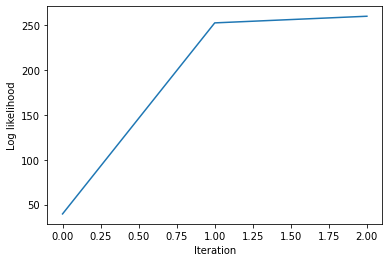

In [178]:
mi = np.array([30, 30])
sigma = np.array([100, 100])
prob = np.array([0.5, 0.5])
new_mi, new_sigma, new_prob, iterations, cost_function_results = EM(X3, 2, mi, sigma, prob)

print("Centers:\n", new_mi, "\nDeviation:\n", new_sigma, "\nProbability:\n", new_prob, "\nIterations: ", iterations) 
print("Bayesian information criterion: ", bic(X3.shape[0], 2, np.max(cost_function_results)))        

plt.plot(np.arange(len(cost_function_results)), cost_function_results)
plt.xlabel("Iteration")
plt.ylabel("Log likelihood")
plt.show()

#################### - Start: 2 - ####################
!Starting parameters!
Centers:
 [9.18154341 0.1426502 ] 
Deviation:
 [50.78448132 65.28651794] 
Probability:
 [0.5 0.5]

!Result!
Centers:
 [39.96366289 19.83588253] 
Deviation:
 [5.00578436 4.8536451 ] 
Probability:
 [0.70211858 0.29788142] 
Iterations:  55

Bayesian information criterion:  6.803229316434793


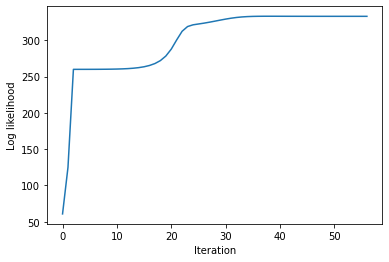

#################### - End: 2 - ####################
#################### - Start: 3 - ####################
!Starting parameters!
Centers:
 [5.5637264  2.86358114 3.23567386] 
Deviation:
 [77.60888021 67.00956076 11.3920913 ] 
Probability:
 [0.33333333 0.33333333 0.33333333]

!Result!
Centers:
 [40.33024908 39.19681099 19.72729502] 
Deviation:
 [4.60013672 5.71162684 4.78944261] 
Probability:
 [0.42893765 0.27752582 0.29353653] 
Iterations:  100

Bayesian information criterion:  16.007667446962863


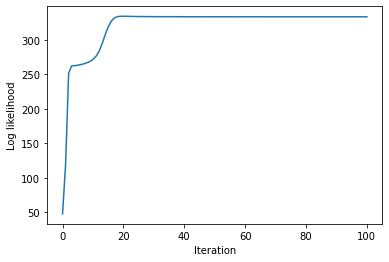

#################### - End: 3 - ####################
#################### - Start: 4 - ####################
!Starting parameters!
Centers:
 [3.0829428  4.18166903 4.86278799 7.35212142] 
Deviation:
 [20.81742564 66.11152773 88.78101136 23.30557208] 
Probability:
 [0.25 0.25 0.25 0.25]

!Result!
Centers:
 [19.7435987  40.21530515 40.33615046 39.25879367] 
Deviation:
 [4.79952423 4.69582716 4.57453272 5.70228734] 
Probability:
 [0.29416902 0.2345378  0.20940611 0.26188707] 
Iterations:  100

Bayesian information criterion:  25.218515702581385


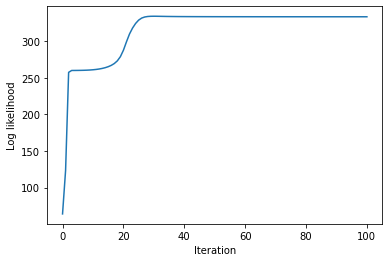

#################### - End: 4 - ####################
#################### - Start: 5 - ####################
!Starting parameters!
Centers:
 [9.3181605  5.05786831 8.57990018 7.90768892 9.83402259] 
Deviation:
 [10.25500741 71.41404869 64.73354816 35.42538936 42.83387749] 
Probability:
 [0.2 0.2 0.2 0.2 0.2]

!Result!
Centers:
 [19.55391474 35.06947132 40.16482955 40.02987422 40.2492166 ] 
Deviation:
 [4.70968835 7.61003427 4.90061087 5.24282972 4.56165792] 
Probability:
 [0.28322871 0.07033875 0.15577912 0.19266373 0.29798968] 
Iterations:  100

Bayesian information criterion:  34.43062696530422


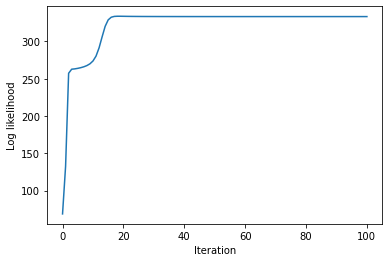

#################### - End: 5 - ####################


In [186]:
for k in range(2, 6):
    print("#################### - Start: " + str(k) + " - ####################")
    min_bic_result = np.inf
    best_start = ()
    best_res = ()
    for it in range(10):
        centers = np.random.rand(k) * 10
        deviation = np.random.rand(k) * 100
        probability = np.array([1/k for kk in range(1, k + 1)])

        new_m, new_s, new_prob, iterations, cost_function_results = EM(X3, k, centers, deviation, probability)
        
        BIC = bic(X3.shape[0], k, np.max(cost_function_results))
        
        if BIC < min_bic_result: 
            min_bic_result = BIC
            best_start = (centers, deviation, probability)
            best_res = (new_m, new_s, new_prob, iterations, cost_function_results)
            
    print("!Starting parameters!")
    print("Centers:\n", best_start[0], "\nDeviation:\n", best_start[1], "\nProbability:\n", best_start[2]) 
    print("\n!Result!")
    print("Centers:\n", best_res[0], "\nDeviation:\n", best_res[1], "\nProbability:\n", best_res[2], "\nIterations: ", best_res[3]) 

    print("\nBayesian information criterion: ", min_bic_result)
    
    plt.plot(np.arange(len(best_res[-1])), best_res[-1])
    plt.xlabel("Iteration")
    plt.ylabel("Log likelihood")
    plt.show()
    print("#################### - End: " + str(k) + " - ####################")

---
## Zadatak 6
---
Koristeći implementaciju EM algoritma iz prošlog zadatka trebate odrediti parametre za podatke koji su vam dani u datoteci 'z2-data' za k = 4. 
- Pokrenite algoritam koristeći slučajno odabrane parametre kao početne (algoritam pokrenite 10 puta i odaberite najbolji rezultat)
- Pokrenite k-means algoritam (može sklearn) na vašim podacima. Dobivena središte koritite kao početne vrijednosti za očekivanje. 

!Starting parameters!
Centers:
 [7.77928513 3.24660323 2.17331945 9.17989633] 
Deviation:
 [94.01451117 48.61455374 52.63346766 97.00078752] 
Probability:
 [0.25 0.25 0.25 0.25]

!Result!
Centers:
 [41.11934774 21.12309388 18.94913278 39.61563074] 
Deviation:
 [5.13165688 5.34592032 4.43025201 4.82666084] 
Probability:
 [0.19012858 0.14659092 0.1559394  0.5073411 ] 
Iterations:  100

Bayesian information criterion:  25.218359606135618


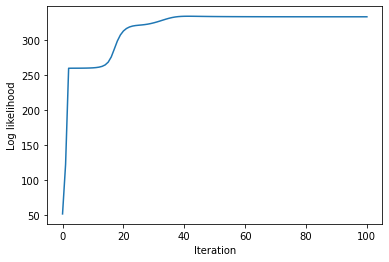

In [187]:
k = 4

min_bic_result = np.inf
best_start = ()
best_res = ()
for it in range(10):
    centers = np.random.rand(k) * 10
    deviation = np.random.rand(k) * 100
    probability = np.array([1/k for kk in range(1, k + 1)])

    new_m, new_s, new_prob, iterations, cost_function_results = EM(X3, k, centers, deviation, probability)

    BIC = bic(X3.shape[0], k, np.max(cost_function_results))

    if BIC < min_bic_result: 
        min_bic_result = BIC
        best_start = (centers, deviation, probability)
        best_res = (new_m, new_s, new_prob, iterations, cost_function_results)

print("!Starting parameters!")
print("Centers:\n", best_start[0], "\nDeviation:\n", best_start[1], "\nProbability:\n", best_start[2]) 
print("\n!Result!")
print("Centers:\n", best_res[0], "\nDeviation:\n", best_res[1], "\nProbability:\n", best_res[2], "\nIterations: ", best_res[3]) 

print("\nBayesian information criterion: ", min_bic_result)

plt.plot(np.arange(len(best_res[-1])), best_res[-1])
plt.xlabel("Iteration")
plt.ylabel("Log likelihood")
plt.show()

Scikit learn KMeans na `z3-data`

In [189]:
kmeans_z3 = KMeans(4).fit(X3)

Dobiveni centri

In [191]:
print(kmeans_z3.cluster_centers_)

[[36.77711202]
 [16.22862372]
 [44.38000862]
 [24.48238911]]


Ubacimo dobivene centre za očekivanje u EM algoritmu

!Starting parameters!
Centers:
 [36.77711202 16.22862372 44.38000862 24.48238911] 
Deviation:
 [55.40183149 10.20628693 95.09754338 81.00862253] 
Probability:
 [0.25 0.25 0.25 0.25]

!Result!
Centers:
 [40.01209189 19.4413996  40.88752092 32.12409036] 
Deviation:
 [4.65966688 4.65172838 5.29730944 8.15903455] 
Probability:
 [0.49709942 0.27208694 0.15673705 0.07407659] 
Iterations:  100

Bayesian information criterion:  25.220137264621677


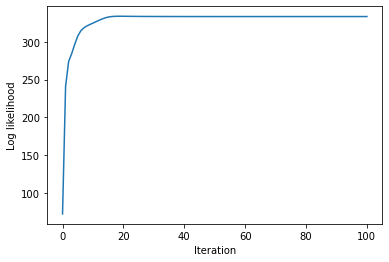

In [192]:
k = 4

min_bic_result = np.inf
best_start = ()
best_res = ()
for it in range(10):
    centers = kmeans_z3.cluster_centers_.ravel()
    deviation = np.random.rand(k) * 100
    probability = np.array([1/k for kk in range(1, k + 1)])

    new_m, new_s, new_prob, iterations, cost_function_results = EM(X3, k, centers, deviation, probability)

    BIC = bic(X3.shape[0], k, np.max(cost_function_results))

    if BIC < min_bic_result: 
        min_bic_result = BIC
        best_start = (centers, deviation, probability)
        best_res = (new_m, new_s, new_prob, iterations, cost_function_results)

print("!Starting parameters!")
print("Centers:\n", best_start[0], "\nDeviation:\n", best_start[1], "\nProbability:\n", best_start[2]) 
print("\n!Result!")
print("Centers:\n", best_res[0], "\nDeviation:\n", best_res[1], "\nProbability:\n", best_res[2], "\nIterations: ", best_res[3]) 

print("\nBayesian information criterion: ", min_bic_result)

plt.plot(np.arange(len(best_res[-1])), best_res[-1])
plt.xlabel("Iteration")
plt.ylabel("Log likelihood")
plt.show()